In [558]:
from sage.symbolic.substitution_map import make_map
from plotly import graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [559]:
# %store -r Tmax
# %store -r Tmin 
# %store -r TEd
# TEd

Vmax = np.loadtxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Vmax.txt')
Vmin = np.loadtxt('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/Vmin.txt')
VEd_slu = pd.read_csv('/home/matteo/ownCloud/UNITN/Tecnica-delle-Costruzioni/VEd_slu.csv')
VEd_slu

,Section,TEd+ [kN],smax [m],TEd- [kN],smin [m]
0,N1,150.590167,0.00,0.000000,0.00
1,N2,286.437347,3.00,-245.457255,3.00
2,N3,272.636139,7.50,-286.334051,7.50
3,N4,266.790145,11.50,-266.497699,11.50
4,N5,246.693151,16.50,-261.914745,16.50
5,N6,208.848422,22.65,-202.221517,22.65
6,N7,0.000000,26.65,-105.286297,26.65


In [560]:
cot_theta, Asw, s, rho_l, theta = var('cot_theta, Asw, s, rho_l, theta')
d = 460;
gammac = 1.5
fck = 450;
fyd = round(fck/1.15,2);
fck = 25;
fcd = .85*fck/gammac;
b = 300;
Phi_l = 18; #mm


In [638]:
VEd = [150.59, 245.457, 286.437, 286.33, 272.636, 266.498, 266.79, 261.915, 246.693, 202.222, 208.848, 105.286];
len(VEd)

12

In [639]:
def area(diam):
    area = float(pi*diam**2 /4)
    return area

def deg(rad):
    deg = float(rad*180/pi)
    return deg

def rad(deg):
    rad = float(deg*pi/180)
    return rad

---
## Sezione non armata a taglio

In [640]:
rho_l = 1/(b*d) *np.array([243*pi, 405*pi, 405*pi, 486*pi, 486*pi, 486*pi, 486*pi, 486*pi, 486*pi, 405*pi, 405*pi, 405*pi])
rho_l = rho_l.tolist()
rho_l

[0.0017608695652173913*pi,
 0.002934782608695652*pi,
 0.002934782608695652*pi,
 0.0035217391304347826*pi,
 0.0035217391304347826*pi,
 0.0035217391304347826*pi,
 0.0035217391304347826*pi,
 0.0035217391304347826*pi,
 0.0035217391304347826*pi,
 0.002934782608695652*pi,
 0.002934782608695652*pi,
 0.002934782608695652*pi]

In [641]:
VRdc = np.zeros(len(rho_l))
for i in range (0, len(rho_l)):
    VRdc[i] = max(.18*min(1+(200/d)**(1/2), 2) * (100*rho_l[i]*fck)**(1/3) /gammac * b*d, .035*min(1+(200/d)**(1/2), 2)*fck**(1/2))/1000

VRdc

array([65.95969881, 78.20387036, 78.20387036, 83.10401298, 83.10401298,
       83.10401298, 83.10401298, 83.10401298, 83.10401298, 78.20387036,
       78.20387036, 78.20387036])

In [642]:
for i in range (0, len(VRdc)):
    if VRdc[i] > VEd[i]:
        print('N{}: Armatura a taglio non necessaria'.format(i+1))
    else:
        print('N{}: Armatura a taglio necessaria'.format(i+1))

N1: Armatura a taglio necessaria
N2: Armatura a taglio necessaria
N3: Armatura a taglio necessaria
N4: Armatura a taglio necessaria
N5: Armatura a taglio necessaria
N6: Armatura a taglio necessaria
N7: Armatura a taglio necessaria
N8: Armatura a taglio necessaria
N9: Armatura a taglio necessaria
N10: Armatura a taglio necessaria
N11: Armatura a taglio necessaria
N12: Armatura a taglio necessaria


---

In [643]:
VRdmax(cot_theta) = .5*1*b*.9*d*fcd*cot_theta/(1+(cot_theta)**2)/1000
VRdmax

cot_theta |--> 879.750000000000*cot_theta/(cot_theta^2 + 1)

In [644]:
VRds(cot_theta, Asw, s) = Asw/s * .9*d*fyd*cot_theta/1000
VRds

(cot_theta, Asw, s) |--> 161.998200000000*Asw*cot_theta/s

---
## Resistenza a taglio massima

La resistenza a taglio massima lato calcestruzzo si ha per $\theta = \dfrac{\pi}{4}$ e cioè per $\cot\theta = 1$

In [645]:
VRcmax = VRdmax(1)
print(VRcmax,'kN')

439.875000000000 kN


Controllo che il massimo taglio esplicabile dalla sezione sia maggiore del taglio sollecitante: il massimo taglio resistente lato calcestruzzo si ha per $\cot\theta = 1$ cioè per $\theta=\dfrac{\pi}{4}$

In [646]:
VRdmax(1) > max(VEd)

439.875000000000 > 286.437000000000

Ok, la sezione è in grado di assorbire il taglio sollecitante e non c'è bisogno di cambiare le dimensioni della sezione o di aumentare la classe del calcestruzzo!

---
## Sezione armata a taglio

In [647]:
Asw_min = 1.5*b
s_max = min(.8*d, 1000/3, 15*Phi_l)
print(Asw_min,'mm^2\n', s_max,'mm')

450.000000000000 mm^2
 270 mm


Si scelgono barre $\Phi\,8\,mm$ con $2$ bracci. L'area delle staffe è

In [648]:
Asw0 = 2*area(8)
Asw0

100.53096491487338

Sono necessarie perciò

In [649]:
print(Asw_min/Asw0,'barre per metro\n',
ceil(Asw_min/Asw0),'barre per metro')

4.47623277445956 barre per metro
 5 barre per metro


con un passo di 

In [650]:
print(1000/(Asw_min/Asw0),'mm\n',
      floor(1000/(Asw_min/Asw0) /10)*10,'mm')

223.402144255274 mm
 220 mm


In [651]:
s0 = floor(1000/(Asw_min/Asw0) /10)*10 
s0 < s_max

True

OK, il passo è accettabile! Posso usare questo passo e questa armatura per armare la parte centrale della trave dove non è necessaria un'armatura a taglio specifica.

L'armatura a taglio interna è $\Phi 8\,mm$ passo $220\,mm$.

### Taglio resistente dell'armatura minima (trave interna)

Il valore dell'angolo del puntone inclinato in questa sezione si ricava ponendo $V_{Rd,max} = V_{Rd,s}$, considerando le condizioni di rottura

In [652]:
theta0 = solve(VRds(cot(theta), Asw0, s0) - VRdmax(cot(theta)), theta, solution_dict=True)

float(theta0[0][theta])>float(theta0[1][theta])
theta0 = float(theta0[1][theta])
print(theta0,'rad=',deg(theta0),'deg')
deg(theta0) >= 21.8

0.29430781733049527 rad= 16.862595810744565 deg


False

L'angolo $\theta < \theta_{min}$. Si deve scegliere
$$ \theta = 21.8\deg$$
Il taglio resistente per il meccanismo che si sviluppa con l'angolo $\theta$ appena fissato è

In [653]:
theta_min = rad(21.8)
print(VRds(round(cot(theta_min),2), Asw0, s0),'kN')
print(VRdmax(round(cot(theta_min),2)),'kN')

185.066310914462 kN
303.362068965517 kN


Il valore del taglio resistente è il minimo tra il taglio trazione e il taglio compressione

In [654]:
print(min(VRds(round(cot(theta_min),2), Asw0, s0), VRdmax(round(cot(theta_min),2))), 'kN')

185.066310914462 kN


cioè il valore di $V_{Rd,s}$.

### Armatura a taglio sugli appoggi

Sugli appoggi l'armatura a taglio va infittita.

L'angolo $\theta$ vale

In [655]:
thetaEd = np.zeros(len(VEd))
for i in range(0, len(VEd)):
    thetaEd[i] = (float(solve(VRdmax(cot(theta)) - VEd[i], theta, solution_dict=True)[1][theta]))
    print(thetaEd[i],'rad = ', deg(thetaEd[i]),'deg')
    if thetaEd[i] < rad(21.8):
        thetaEd[i] = rad(21.8)

print('\n\n')
for i in range(0, len(VEd)):
    print(thetaEd[i],'rad = ', deg(thetaEd[i]),'deg')

0.17470699017709382 rad =  10.009973188581007 deg
0.2959961165631609 rad =  16.959328231331483 deg
0.354567915980815 rad =  20.315245136449875 deg
0.3544076777989241 rad =  20.30606416491068 deg
0.33424604771778504 rad =  19.150887853157403 deg
0.32541653490130495 rad =  18.644994033616427 deg
0.3258338635137447 rad =  18.668905201779275 deg
0.3189007052015158 rad =  18.271664491792514 deg
0.29769110152969963 rad =  17.056443716252275 deg
0.23884335117937552 rad =  13.68471598733919 deg
0.2473623789331834 rad =  14.172820323187198 deg
0.12085041471779118 rad =  6.924218715735122 deg



0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad

Poiché gli angoli sono minori di $\theta_{min} = 21.8\deg$, si sceglie l'angolo minimo come angolo di progetto. Con $\theta = 21.8\deg$ si calcola il passo, che deve essere inferiore del passo massimo $s_{max} = 270\,mm$


In [656]:
sd = np.zeros(len(VEd))
for i in range(0, len(VEd)):
    sd[i] = floor(float(solve(VRds(cot(thetaEd[i]), Asw0, s) - VEd[i], s, solution_dict=True)[0][s])/10)*10
    if sd[i] > s_max:
        sd[i] = s_max
    print(sd[i],'mm')
    
sd

270.0 mm
160.0 mm
140.0 mm
140.0 mm
140.0 mm
150.0 mm
150.0 mm
150.0 mm
160.0 mm
200.0 mm
190.0 mm
270.0 mm


array([270., 160., 140., 140., 140., 150., 150., 150., 160., 200., 190.,
       270.])

### Verifica

Per prima cosa si calcola il valore di $\theta$ a rottura $V_{Rd,s} = V_{Rd,max}$ con i valori di $s$ appena trovati. Il valore dell'angolo deve sempre essere $\theta \geq 21.8\deg$

In [657]:
thetad = np.zeros(len(thetaEd))
for i in range(0, len(sd)):
    thetad[i] = float(solve(VRds(cot(theta), Asw0, sd[i]) == VRdmax(cot(theta)), theta, solution_dict=True)[1][theta])
    print(thetad[i],'rad = ', deg(thetad[i]),'deg')
    if thetad[i] < rad(21.8):
        thetad[i] = rad(21.8)

print('\n\n')
for i in range(0, len(VEd)):
    print(thetad[i],'rad = ', deg(thetad[i]),'deg')

0.2649329173621315 rad =  15.179538018938345 deg
0.34707216972875554 rad =  19.885770511905864 deg
0.3721631933413864 rad =  21.323380268572706 deg
0.3721631933413864 rad =  21.323380268572706 deg
0.3721631933413864 rad =  21.323380268572706 deg
0.3589606262955124 rad =  20.56692889810562 deg
0.3589606262955124 rad =  20.56692889810562 deg
0.3589606262955124 rad =  20.56692889810562 deg
0.34707216972875554 rad =  19.885770511905864 deg
0.30913614778273624 rad =  17.71219656288329 deg
0.31744410866572903 rad =  18.188207657838557 deg
0.2649329173621315 rad =  15.179538018938345 deg



0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =  21.8 deg
0.3804817769347638 rad =

In [686]:
VRds_d = np.zeros(len(VEd))
VRdmax_d = np.zeros(len(VEd))
for i in range(0, len(thetad)):
    VRds_d [i] = (VRds(cot(thetad[i]), Asw0, sd[i]))
    VRdmax_d [i] = VRdmax(cos(thetad[i]))
for i in range(0, len(thetad)):
    print('\nVRds[kN]\t\tVRdmax[kN]\t\t\tVEd[kN]\n',VRds_d[i], '\t',VRdmax_d[i],'\t>\t', VEd[i])
    if VRds_d[i] > VEd[i]:
        print('True')
    else:
        print('False')


VRds[kN]		VRdmax[kN]			VEd[kN]
 150.80553029456914 	 438.66686962357267 	>	 150.590000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 254.48433237208536 	 438.66686962357267 	>	 245.457000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 290.839236996669 	 438.66686962357267 	>	 286.437000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 290.839236996669 	 438.66686962357267 	>	 286.330000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 290.839236996669 	 438.66686962357267 	>	 272.636000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 271.44995453022443 	 438.66686962357267 	>	 266.498000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 271.44995453022443 	 438.66686962357267 	>	 266.790000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 271.44995453022443 	 438.66686962357267 	>	 261.915000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 254.48433237208536 	 438.66686962357267 	>	 246.693000000000
True

VRds[kN]		VRdmax[kN]			VEd[kN]
 203.5874658976683 	 438.66686962357267 	>	 202.222000000000
True

VRds[kN]		VRdmax

In [687]:
VRd = np.zeros(len(VEd))
for i in range(0, len(VEd)):
    VRd[i] = min(VRds_d[i], VRdmax_d[i])
    print(VRd[i], 'kN')

150.80553029456914 kN
254.48433237208536 kN
290.839236996669 kN
290.839236996669 kN
290.839236996669 kN
271.44995453022443 kN
271.44995453022443 kN
271.44995453022443 kN
254.48433237208536 kN
203.5874658976683 kN
214.30259568175612 kN
150.80553029456914 kN


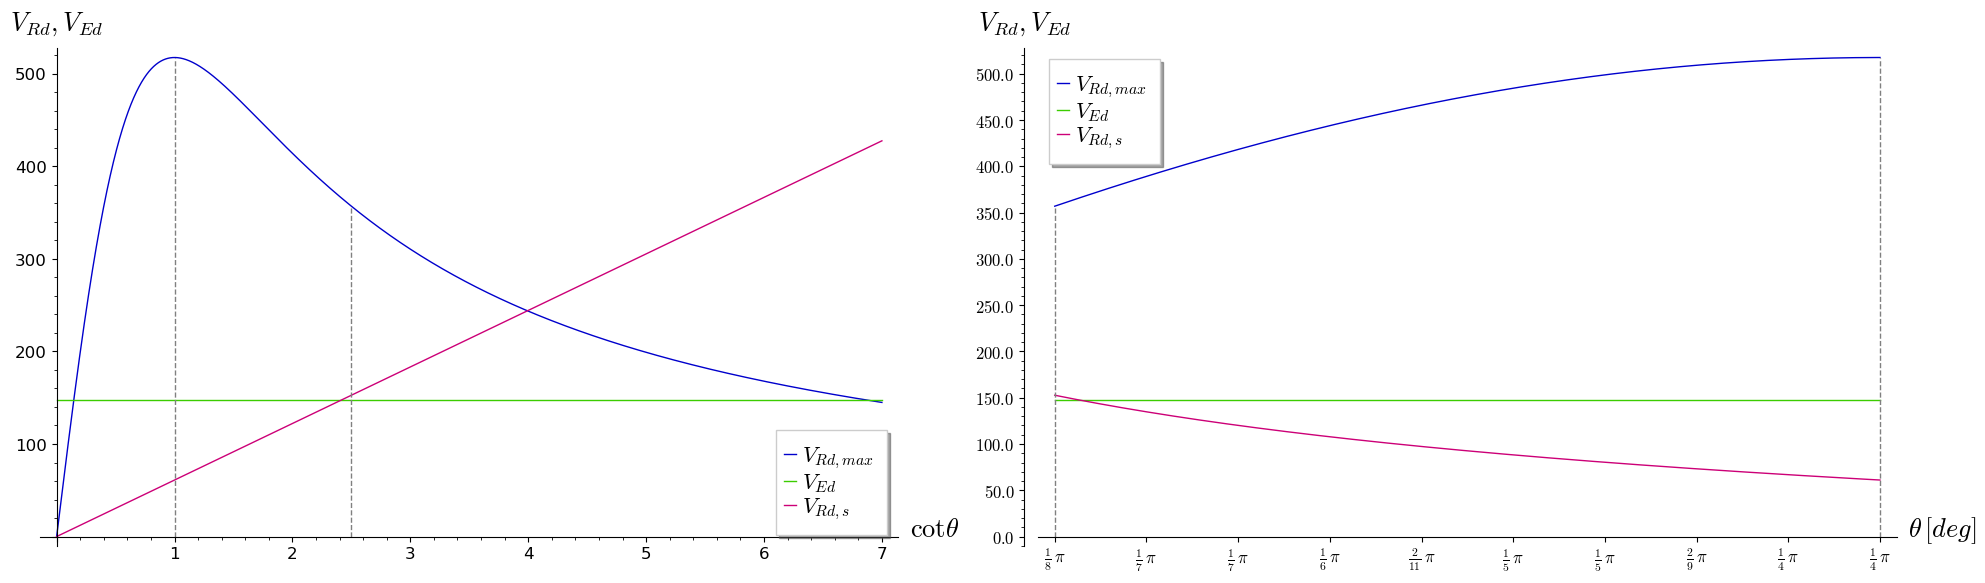

In [285]:
x = np.linspace(21.8, 45, 10)*pi/180
x = x.tolist()

ax1 = plot([VRdmax, VEd[0], VRds.subs({s:s0, Asw:Asw0})], (cot_theta, 0, 7), axes_labels=[r'$\cot\theta$', r'$V_{Rd}, V_{Ed}$'], legend_label=[r'$V_{Rd,max}$',r'$V_{Ed}$', r'$V_{Rd,s}$']) + line([(1,0), (1, VRdmax(1))], color='gray', linestyle="--") + line([(2.5,0), (2.5, VRdmax(2.5))], color='gray', linestyle="--", )
ax2 = plot([.5*1*b*.9*d*fcd*cot(theta)/(1+cot(theta)**2)/1000, VEd[0],.9*Asw0/s0 * .9*d*fyd*cot(theta)/1000 ], (theta, 21.8/180 * math.pi, math.pi/4), axes_labels=[r'$\theta\,[deg]$', r'$V_{Rd}, V_{Ed}$'], legend_label=[r'$V_{Rd,max}$',r'$V_{Ed}$', r'$V_{Rd,s}$'], ticks=[x,50], tick_formatter=pi) + line([(math.pi/4,0), (math.pi/4, VRdmax(1))], color='gray', linestyle="--") + line([(21.8/180 * math.pi,0), (21.8/180 * math.pi, VRdmax(2.5))], color='gray', linestyle="--")
ax1.set_legend_options(font_size='16')
ax2.set_legend_options(font_size='16')
graphics_array([ax1, ax2]).show(figsize=[20,6],fontsize='12')

Calcolo il valore di $\theta$ di progetto in funzione della sollecitazione $V_{Ed}$ invertendo la $V_{Rd,max}$

In [286]:
thetaEd = np.zeros(len(VEd))
for i in range (0, len(VEd)):
    print('N{}:'.format(i+1),'theta [deg] =',float(arccot(solve(VRdmax - VEd[i], cot_theta, solution_dict=True)[1][cot_theta])*180/pi),'\t')
    thetaEd[i] = float(arccot(solve(VRdmax - VEd[i], cot_theta, solution_dict=True)[1][cot_theta])*180/pi)

thetaEd

N1: theta [deg] = 8.2816882538631 	
N2: theta [deg] = 14.065775986920768 	
N3: theta [deg] = 16.69716052676222 	
N4: theta [deg] = 16.766394449275676 	
N5: theta [deg] = 15.726599676781184 	
N6: theta [deg] = 15.479654064515206 	
N7: theta [deg] = 14.388167521218929 	
N8: theta [deg] = 15.118974328507216 	
N9: theta [deg] = 12.043528770693163 	
N10: theta [deg] = 11.499178566811322 	
N11: theta [deg] = 9.725024462939343 	
N12: theta [deg] = 5.780960870601944 	


array([ 8.28168825, 14.06577599, 16.69716053, 16.76639445, 15.72659968,
       15.47965406, 14.38816752, 15.11897433, 12.04352877, 11.49917857,
        9.72502446,  5.78096087])

Poiché risulta $\theta < 21.8\deg$ per ogni nodo, si assume $\theta = 21.8\deg$

In [287]:
for i in range(0, len(thetaEd)):
    if thetaEd[i] < 21.8:
        thetaEd[i] = 21.8
        
thetaEd

array([21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8,
       21.8])

Calcolo il passo delle staffe con i valori di $\theta$ assunti e con l'area delle staffe definita sopra come $A_{sw} = n_b \cdot a_{sw} = 2\,\dfrac{\pi\cdot 8^2}{4}$, con $\Phi_{sw} = 8\,mm$

In [314]:
s0 = np.zeros(len(thetaEd))
for i in range (0, len(thetaEd)):
    print(np.array(float(solve(VRds(cot(thetaEd[i]*pi/180), Asw0, s) - VEd[i], s, solution_dict=True)[0][s])))
    s0[i] = floor((solve(VRds(cot(thetaEd[i]*pi/180), Asw0, s) - VEd[i], s, solution_dict=True)[0][s])/10)*10
    
s0

248.40351638744917
150.1891436108045
128.65929687220904
128.18973598199034
135.71014985617026
137.65513575587855
147.10228653090473
140.61736563601525
173.51044008590873
181.2463792222665
212.66373514482848
353.3150121242324


array([240., 150., 120., 120., 130., 130., 140., 140., 170., 180., 210.,
       350.])

103.720900000000

In [305]:
float(solve(VRds(2.5, Asw0, s) - VEd[-1], s, solution_dict=True)[0][s])

353.2898066973131

In [174]:
s0 = []
s0 = solve(VRds(cot_theta0, Asw0, s) - VEd[0], s, solution_dict=True)[0][s]
s0 = round(s0, 2)
print(s0, 'mm')
s0 = 240;
print('s = ', s0, 'mm')

248.39 mm
s =  240 mm


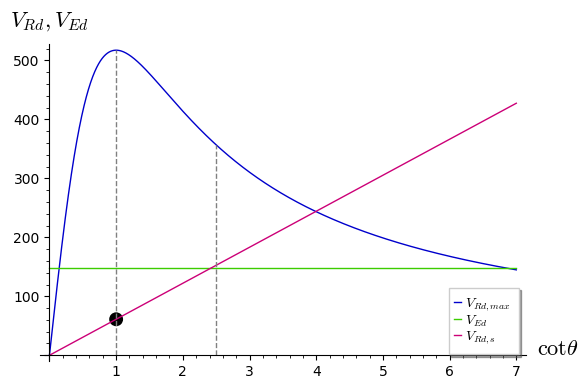

In [175]:
plt = plot([VRdmax, VEd[0], VRds.subs({s:s0, Asw:Asw0})], (cot_theta, 0, 7), axes_labels=[r'$\cot\theta$', r'$V_{Rd}, V_{Ed}$'], legend_label=[r'$V_{Rd,max}$',r'$V_{Ed}$', r'$V_{Rd,s}$'])
plt += line([(1,0), (1, VRdmax(1))], color='gray', linestyle="--") + line([(2.5,0), (2.5, VRdmax(2.5))], color='gray', linestyle="--") + point([(1,VRds(1, Asw0, s0))], size='100', color='black')
plt.set_legend_options(loc=0)
# help(plt.set_legend_options)
plt.plot()

In [12]:
VRd_N1 = min(VRdmax(1), VRds(1, Asw0, s0))
print('VRd_N1 = ', VRd_N1, 'kN')
VRd_N1 > VEd[0]

VRd_N1 =  162.860163162095 kN


162.860163162095 > 147.526700000000